In [303]:
# %pip install seaborn

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [170]:
mu = 0.07
sigma = 0.15

In [231]:
N = 10000

In [232]:
y = 30

In [233]:
x = 1

In [234]:
wr = 0.04

In [283]:
def success_rate(y,wr):
    trajectories = pd.DataFrame([get_trajectory(y,wr) for _ in range(N)])
    return sum(trajectories[y]>0)/len(trajectories)


In [284]:
def get_trajectory(y,wr):
    fail = False
    x = 1
    xs = [x]
    for i in np.random.normal(mu, sigma, y):
        x=x*np.exp(i)-wr
        # x = max(x,0)
        xs += [x]
    return xs

In [286]:
trajectories_4 = pd.DataFrame([get_trajectory(y,0.04) for _ in range(N)])

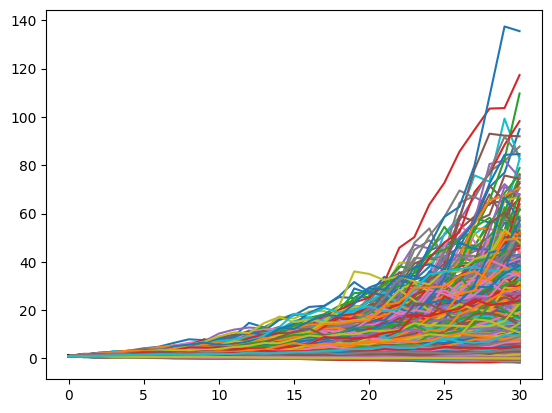

In [287]:
plt.plot(trajectories_4.T);

<Axes: >

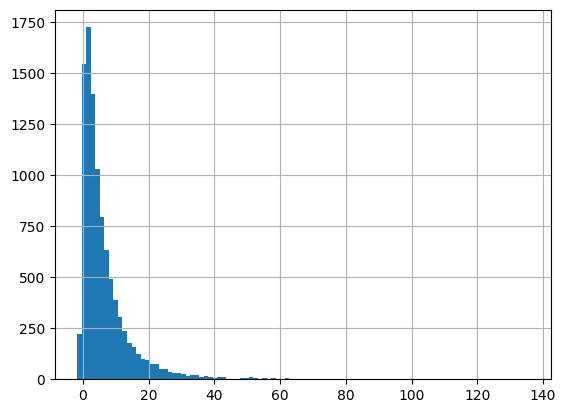

In [288]:
trajectories_4[y].hist(bins=100)

<Axes: >

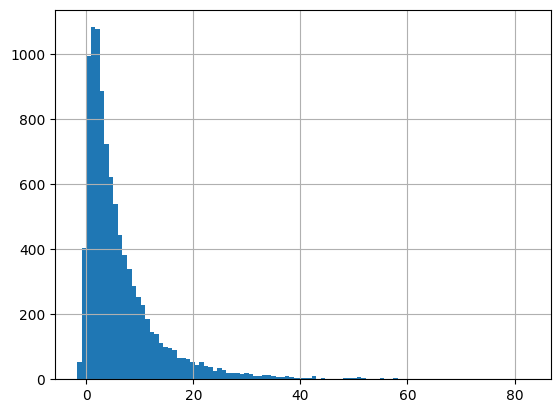

In [289]:
trajectories_4.sort_values(by=y).iloc[:-10].loc[:,y].hist(bins=100)

In [290]:
sum(trajectories_4[y]>0)/len(trajectories_4)

0.9569

In [266]:
trajectories_5 = pd.DataFrame([get_trajectory(y,0.05) for _ in range(N)])

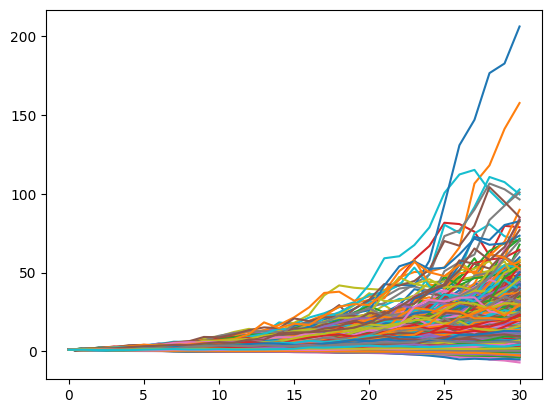

In [267]:
plt.plot(trajectories_5.T);

<Axes: >

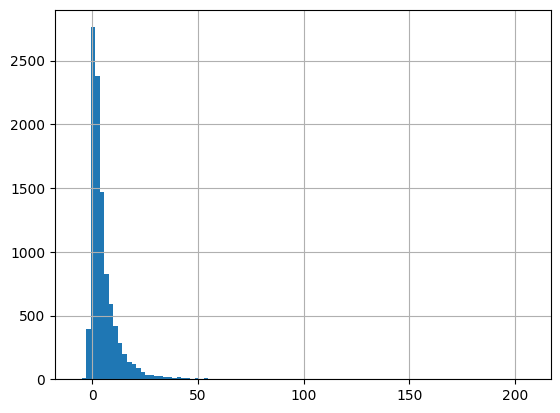

In [268]:
trajectories_5[y].hist(bins=100)

<Axes: >

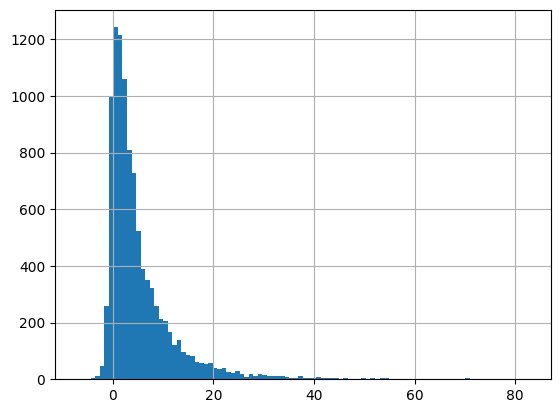

In [269]:
trajectories_5.sort_values(by=y).iloc[:-10].loc[:,y].hist(bins=100)

In [270]:
sum(trajectories_5[y]>0)/len(trajectories_5)

0.8836

In [291]:
trajectories = pd.DataFrame([get_trajectory(y,0.07) for _ in range(N)])

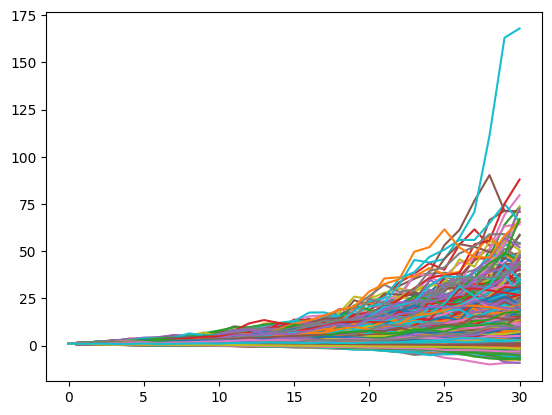

In [272]:
plt.plot(trajectories.T);

<Axes: >

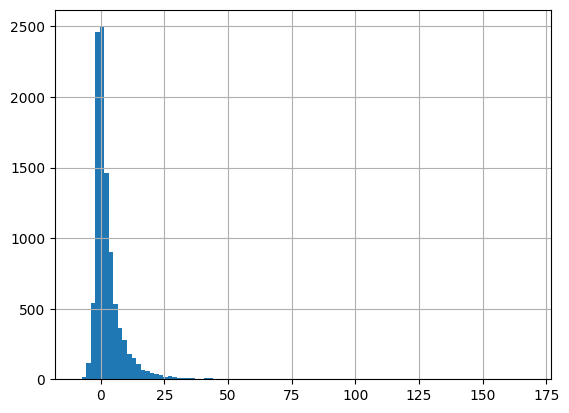

In [273]:
trajectories[y].hist(bins=100)

<Axes: >

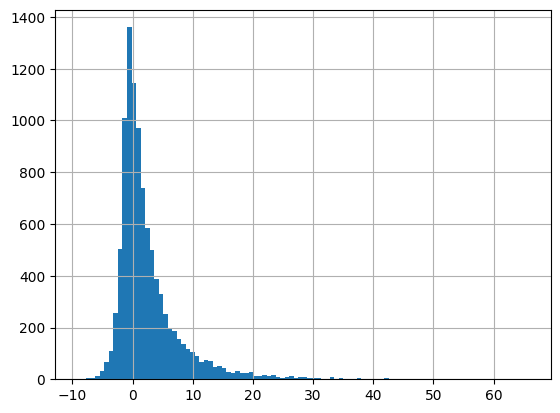

In [274]:
trajectories.sort_values(by=y).iloc[:-10].loc[:,y].hist(bins=100)

In [275]:
sum(trajectories[y]>0)/len(trajectories)

0.6309

In [309]:
results = {}
for y in tqdm(range(10,100,10)):
    results_y = {}
    for wr in range(1,10):
        results_y[wr] = success_rate(y,wr/100)
    results[y] = results_y

  0%|          | 0/9 [00:00<?, ?it/s]

In [310]:
results_df = pd.DataFrame(results)

In [311]:
results_df

,10,20,30,40,50,60,70,80,90
1,1.0000,1.0000,1.0000,0.9999,0.9998,0.9999,0.9998,0.9999,1.0000
2,1.0000,1.0000,0.9992,0.9981,0.9960,0.9953,0.9949,0.9929,0.9929
3,1.0000,0.9987,0.9902,0.9785,0.9707,0.9636,0.9604,0.9624,0.9616
4,1.0000,0.9906,0.9549,0.9243,0.9059,0.8951,0.8942,0.8810,0.8848
5,0.9998,0.9608,0.8845,0.8294,0.8072,0.7892,0.7746,0.7703,0.7707
6,0.9984,0.8977,0.7724,0.6937,0.6652,0.6535,0.6359,0.6312,0.6315
7,0.9930,0.7979,0.6321,0.5602,0.5160,0.5081,0.4942,0.4898,0.4867
8,0.9779,0.6809,0.5055,0.4352,0.3844,0.3780,0.3634,0.3595,0.3589
9,0.9445,0.5555,0.3725,0.3141,0.2826,0.2661,0.2539,0.2510,0.2550


<Axes: >

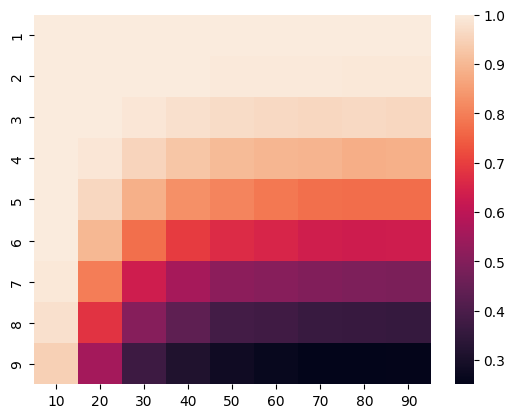

In [312]:
sns.heatmap(results_df)